# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [54]:
#For PS Statement
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#For solution ONLY
import matplotlib.cm as cmx
import matplotlib.colors as colors

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Wheelahan, Christopher

### Part (b): Course Number

AC 209a

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [55]:
#read data into pandas df
df = pd.read_csv('dataset_HW1.txt')

#size of data frame
print 'number of patients:', df.shape[0]

#print head
df.head(n=5)

number of patients: 2300


,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0.0,3,female
1,619711,13.787380,162.408932,0.0,15,female
2,619595,22.675580,130.227221,0.0,6,female
3,619990,13.500884,138.486428,0.0,17,male
4,619157,2.967811,144.105985,0.0,6,female


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [56]:
#compute stats and store them in a dataframe
column_names = df[range(1, 5)].columns.values
stats = pd.DataFrame(columns=column_names)

stats.loc['max'] = df[range(1, 5)].max()
stats.loc['min'] = df[range(1, 5)].min()
stats.loc['range'] = df[range(1, 5)].max() - df[range(1, 5)].min()
stats.head(n=5)

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.0
min,-22.591722,-56.388949,0.0,3.0
range,102.801470,420.610725,3.0,87.0


In [31]:
#split df's and print descriptive statistics
children = df[df['patient_age'] < 18]
adult_women = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]
adult_male = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
                
children.describe()

,patient_id,marker_1,marker_2,subtype,patient_age
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,619496.832500,26.267379,121.396907,1.500000,10.106250
std,289.652024,24.972128,23.658433,1.118733,4.307337
min,619000.000000,-22.591722,70.538569,0.000000,3.000000
25%,619244.750000,3.003559,100.247938,0.750000,6.750000
50%,619502.500000,26.868357,121.799063,1.500000,10.000000
75%,619745.250000,49.328335,143.000116,2.250000,14.000000
max,619999.000000,80.209748,171.429357,3.000000,17.000000


In [57]:
adult_women.describe()

,patient_id,marker_1,marker_2,subtype,patient_age
count,800.00000,800.000000,800.000000,800.000000,800.000000
mean,622502.17625,44.053269,74.006378,0.500000,54.613750
std,289.08449,7.141580,53.320292,0.500313,21.094034
min,622001.00000,28.364561,-43.386768,0.000000,18.000000
25%,622254.75000,39.225399,30.751708,0.000000,38.000000
50%,622504.00000,43.911490,73.086403,0.500000,56.000000
75%,622752.25000,49.210179,119.656499,1.000000,72.000000
max,622999.00000,59.702106,190.047718,1.000000,90.000000


In [58]:
adult_male.describe()

,patient_id,marker_1,marker_2,subtype,patient_age
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,621493.360000,24.678005,124.883059,1.285714,53.744286
std,289.279677,6.956745,57.523807,0.700355,21.295497
min,621001.000000,1.860516,-56.388949,0.000000,18.000000
25%,621244.750000,19.682346,81.843183,1.000000,35.000000
50%,621491.500000,26.168875,110.893774,1.000000,54.000000
75%,621743.750000,29.883573,164.800374,2.000000,72.000000
max,621999.000000,40.458624,364.221777,2.000000,90.000000


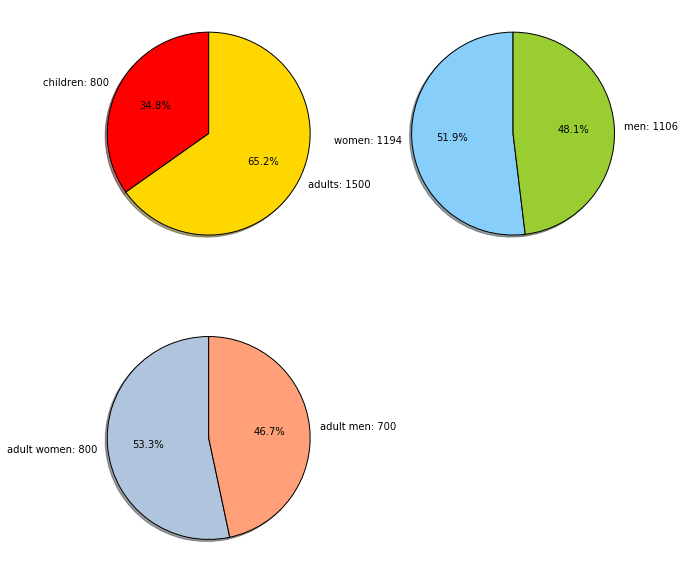

In [59]:
#children vs adults pie chart
children2 = df[df['patient_age'] < 18].shape[0]
adults2 = df.shape[0] - children2

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.pie([children2, adults2], 
        labels=['children: ' + str(children2), 'adults: ' + str(adults2)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women2 = df[df['patient_gender'] == 'female'].shape[0]
men2 = df.shape[0] - women2

ax2 = fig.add_subplot(222)
ax2.pie([women2, men2], 
        labels=['women: ' + str(women2), 'men: ' + str(men2)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#adult women vs men pie chart
adult_women2 = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')].shape[0]
adult_men2 = adults2 - adult_women2

ax3 = fig.add_subplot(223)
ax3.pie([adult_women2, adult_men2], 
        labels=['adult women: ' + str(adult_women2), 'adult men: ' + str(adult_men2)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

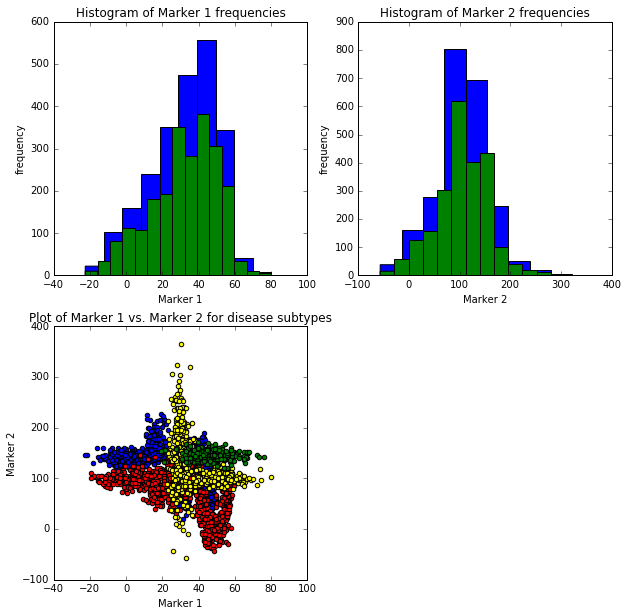

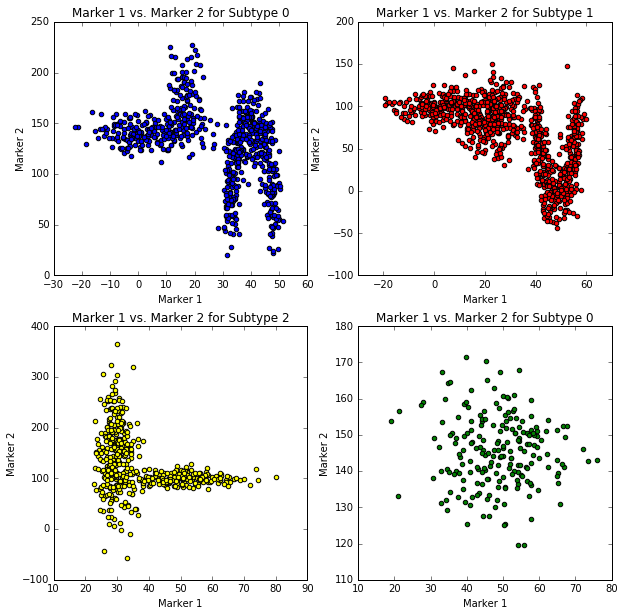

In [69]:
#instantiate the figure
fig2 = plt.figure(figsize=(10, 10))
mk1plot = fig2.add_subplot(221)

# Default bins is 10
mk1plot.hist([df['marker_1']])
plt.xlabel('Marker 1')
plt.ylabel('frequency')
plt.title('Histogram of Marker 1 frequencies')

# 15 bins
mk1plot.hist([df['marker_1']], bins=15)

# 25 bins shows a weird outlier, which I don't like
# histplot.hist([df['marker_1']], bins=50)

# and 50 bins is way too many.
# histplot.hist([df['marker_1']], bins=50)

#show same bins for marker 2
mk2plot = fig2.add_subplot(222)
plt.xlabel('Marker 2')
plt.ylabel('frequency')
plt.title('Histogram of Marker 2 frequencies')
mk2plot.hist([df['marker_2']])
mk2plot.hist([df['marker_2']], bins=15)

#split DF by subtype
st0 = df[df['subtype'] == 0.0]
st1 = df[df['subtype'] == 1.0]
st2 = df[df['subtype'] == 2.0]
st3 = df[df['subtype'] == 3.0]

#Let's see what Mk1 vs Mk2 looks like by subtype
scatplot = fig2.add_subplot(223)
scatplot.scatter(st0['marker_1'], st0['marker_2'], c='blue')
scatplot.scatter(st1['marker_1'], st1['marker_2'], c='red')
scatplot.scatter(st2['marker_1'], st2['marker_2'], c='yellow')
scatplot.scatter(st3['marker_1'], st3['marker_2'], c='green')
plt.xlabel('Marker 1')
plt.ylabel('Marker 2')
plt.title('Plot of Marker 1 vs. Marker 2 for disease subtypes')
plt.show()
#ew... not helpful

# 4 separate plots for each subtype
new_fig = plt.figure(figsize=(10, 10))
scatplot0 = new_fig.add_subplot(221)
plt.xlabel('Marker 1')
plt.ylabel('Marker 2')
plt.title('Marker 1 vs. Marker 2 for Subtype 0')
scatplot0.scatter(st0['marker_1'], st0['marker_2'], c='blue')
scatplot1 = new_fig.add_subplot(222)
plt.xlabel('Marker 1')
plt.ylabel('Marker 2')
plt.title('Marker 1 vs. Marker 2 for Subtype 1')
scatplot1.scatter(st1['marker_1'], st1['marker_2'], c='red')
scatplot2 = new_fig.add_subplot(223)
plt.xlabel('Marker 1')
plt.ylabel('Marker 2')
plt.title('Marker 1 vs. Marker 2 for Subtype 2')
scatplot2.scatter(st2['marker_1'], st2['marker_2'], c='yellow')
scatplot3 = new_fig.add_subplot(224)
plt.xlabel('Marker 1')
plt.ylabel('Marker 2')
plt.title('Marker 1 vs. Marker 2 for Subtype 3')
scatplot3.scatter(st3['marker_1'], st3['marker_2'], c='green')

plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

The histograms in part C show:
    The default bins for marker 1 show a single median/mean between 40-50. Increasing the bins slightly shows two peaks near 25-30, and 40-45. Increasing the bins from there only adds confusion and fewer than 10 bins does not show the full relationship of the markers.
    
    The same story is true for marker 2, but with slightly smaller magnitude.

The scatter plots show:
    Subtype 0 has large distributions of X (marker 1) around the median for Y (marker 2) and large distributions of Y around the median for X. There is also a distribution following a negative paraboloid function of marker 2 centered around the median of marker 1 + ~30. Very weird relationship for a biological marker.
    
    Subtype 1 has large distributions of X (marker 1) around the median for Y (marker 2) There is also a distribution following a positive paraboloid function of marker 2 centered around the median of marker 1 + ~25. Again, very weird relationship for a biological marker. Also weird that it follows the opposite pattern to subtype 1.
    
    Subtype 2 has large distributions of X (marker 1) around the median for Y (marker 2) and large distributions of Y around the median for X. There are no other obvious relationships.
    
    Subtype 3 has a seemingly random cloud of data centered around marker 1 = 50, marker 2 = 145.
    
These two do support one another:
    The two tell the same story, in context; however, the scatter plots tell a much more vivid one. The scatter plots show that there is a very important relationship that happens in the subtype 0 and 1 relationships between marker 1 and marker 2 that the histograms do not show. The paraboloid functions are interesting and would not have been picked up simply by the histograms; unless enough definition was acquired.

In comparison to the statistics calculated in part B...
    The means and medians calculated in part B make sense, but really don't tell any kind of interesting story. Subtype 0 & 1 will show a mean that is sensitive to the paraboloid shape, and a median that is slightly smaller for both markers 1 & 2. Median and Mean would be meaningful for subtype 2. Subtype 3 is a seemingly random cloud of data, so no numeric statistics would be particularly helpful.

All of this put togehter shows that...
    It looks like (and looks is the key word... the graphs are necessary to make this determination) that subtypes 0 & 2 have a meaningful relationship between marker 1 & 2, subtype 2 does not and just hase large distributions of X (marker 1) around the median for Y (marker 2) and large distributions of Y around the median for X. Subtype 3 is a seemingly random cloud.

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

In [36]:
# new DFs for children, by subtype
st0 = children[df['subtype'] == 0.0]
st1 = children[df['subtype'] == 1.0]
st2 = children[df['subtype'] == 2.0]
st3 = children[df['subtype'] == 3.0]

# calculate means
st0_m1 = st0['marker_1'].mean()
st0_m2 = st0['marker_2'].mean()
st1_m1 = st1['marker_1'].mean()
st1_m2 = st1['marker_2'].mean()
st2_m1 = st2['marker_1'].mean()
st2_m2 = st2['marker_2'].mean()
st3_m1 = st3['marker_1'].mean()
st3_m2 = st3['marker_2'].mean()

print "Subtype 0 Marker 1 mean is:", st0_m1, "Marker 2 mean is:", st0_m2
print "Subtype 1 Marker 1 mean is:", st1_m1, "Marker 2 mean is:", st1_m2
print "Subtype 2 Marker 1 mean is:", st2_m1, "Marker 2 mean is:", st2_m2
print "Subtype 3 Marker 1 mean is:", st3_m1, "Marker 2 mean is:", st3_m2

Subtype 0 Marker 1 mean is: 3.27981992225 Marker 2 mean is: 140.149140174
Subtype 1 Marker 1 mean is: 3.32540268905 Marker 2 mean is: 99.7043767639
Subtype 2 Marker 1 mean is: 49.942424999 Marker 2 mean is: 100.196777456
Subtype 3 Marker 1 mean is: 48.5218676577 Marker 2 mean is: 145.537334109


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In thinking about this method of classification... using euclidean distance to classify seems like a logical and reasonable way to go about interpolating or predicting subtype, but I would imagine it does a better job of predicting subtypes 2 & 3. This is because subtypes 1 & 2 have the particular shape that may throw off the euclidean distance to the mean. It would make more sense to create a classification function, rather than simply calculating distance to the mean.

The evaluation is a reasonable measure of how good the model is because it will show a percentage of which ones are right and which are not. Unfortunately, if there are very skewed distributions of the various subtypes - or one subtype is very homogenous and distinct from the others while others have lots of patterns going on and look more or less like one another, you could do a really good job of predicting the first subtype and a really lousy job of predicting the other 3.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

In [51]:
# This block will randomly make an approx. 70/30 split for the children group
rand = np.random.rand(len(children)) < 0.7
children.index = np.random.rand(len(children))
train = children[rand]
test = children[~rand]
test.index= [range(0, len(test))]

In [41]:
#initialize variables
st0_diff = 0
st1_diff = 0
st2_diff = 0
st2_diff = 0
subtype_list = []
assign_list = []

def classify(train, test):

# again, split up our DF by subtype
    st0 = train[train['subtype'] == 0.0]
    st1 = train[train['subtype'] == 1.0]
    st2 = train[train['subtype'] == 2.0]
    st3 = train[train['subtype'] == 3.0]

# and calculate means
    st0_m1 = st0['marker_1'].mean()
    st0_m2 = st0['marker_2'].mean()
    st1_m1 = st1['marker_1'].mean()
    st1_m2 = st1['marker_2'].mean()
    st2_m1 = st2['marker_1'].mean()
    st2_m2 = st2['marker_2'].mean()
    st3_m1 = st3['marker_1'].mean()
    st3_m2 = st3['marker_2'].mean()

# for each row in our test set, we will create a new variable with the euclidean distance from each subtype's means
    for td, row in test.iterrows():
        diff_list = []

        st0_diff = (row['marker_1'] - st0_m1) + (row['marker_2'] - st0_m2)
        st1_diff = (row['marker_1'] - st1_m1) + (row['marker_2'] - st1_m2)
        st2_diff = (row['marker_1'] - st2_m1) + (row['marker_2'] - st2_m2)
        st3_diff = (row['marker_1'] - st3_m1) + (row['marker_2'] - st3_m2)

# and append those values to a list.
        diff_list.extend((abs(st0_diff), abs(st1_diff), abs(st2_diff), abs(st3_diff)))

# then append the actual value and the index of the minimum of the absolute value of the difference list to their
#own lists
        subtype_list.append(row['subtype'])
        assign_list.append(diff_list.index(min(abs(i) for i in diff_list)))
        
    return subtype_list, assign_list

classify(train, test)

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,

In [42]:
def evaluate(assign, actual):
# initialize
    bool_list = []

# loop through - for each match, append 1 to bool_list, for a bad match, append 0
    for each in range(len(assign)):
        if assign[each] == actual[each]:
            bool_list.append(1)
        else:
            bool_list.append(0)

# sum the correct matches
    a = float(sum(bool_list))
    b = len(bool_list)

# and divide by the total number to get the accuracy
    return round(a/b, 4)
        
evaluate(assign_list, subtype_list)

0.7705

### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

In [43]:
#reinitialize variables for adult women
rand = np.random.rand(len(adult_women)) <= 0.7
st0 = adult_women[df['subtype'] == 0.0]
st1 = adult_women[df['subtype'] == 1.0]
st2 = adult_women[df['subtype'] == 2.0]
st3 = adult_women[df['subtype'] == 3.0]
st0_diff = 0
st1_diff = 0
st2_diff = 0
st2_diff = 0
subtype_list = []
assign_list = []
train = adult_women[rand]
test = adult_women[~rand]

# classify and evaluate
classify(train, test)
evaluate(assign_list, subtype_list)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.8119

In [44]:
# reinitialize variables for adult men
rand = np.random.rand(len(adult_male)) <= 0.7
st0 = adult_male[df['subtype'] == 0.0]
st1 = adult_male[df['subtype'] == 1.0]
st2 = adult_male[df['subtype'] == 2.0]
st3 = adult_male[df['subtype'] == 3.0]
st0_diff = 0
st1_diff = 0
st2_diff = 0
st2_diff = 0
subtype_list = []
assign_list = []
train = adult_male[rand]
test = adult_male[~rand]

#  classify and evaluate
classify(train, test)
evaluate(assign_list, subtype_list)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.6038

The adult women and children samples show roughly the same degree of accuracy, while the classification of adult males is showing to be significantly less robust. This could be for a number of reasons - children and women could have much starker dichotomies of the markers between subtypes, the samples of women and children could be less homogenous, or males could have small groups of outliers (in the paraboloid shape).

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

In [45]:
#reinitialize
assign_list = []
subtype_list = []

def classify2(train, test):

# for each test row
    for tdtest, rowtest in test.iterrows():
        diff_list = []
        
# iterate through our training DF and keep a list of the differences in values
        for tdtrain, rowtrain in train.iterrows():
            diff = (rowtrain['marker_1'] - rowtest['marker_1']) + (rowtrain['marker_2'] - rowtest['marker_2'])
            diff_list.append(abs(diff))
            
# then find the smallest difference
        a = diff_list.index(min(diff_list))
    
# and once again, append the real value and the assigned value
        assign_list.append(train.iloc[a]['subtype'])
        subtype_list.append(rowtrain['subtype'])
    return subtype_list, assign_list

classify2(train, test)

([2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,

This methodology of classifying is valid because you find the closest match to the test data within the training data and call it the same subtype - the "if it looks like a duck" method of classification, or k-NN. It is reasonable to assume that an observation could be of the same subtype as the closest observation in the training data. This also corrects for the issue in our first classification of randomly seeing observations near one statistical mean, but who are of a different subtype.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [46]:
# reinitialize variables for children
rand = np.random.rand(len(children)) < 0.7
children.index = np.random.rand(len(children))
train = children[rand]
test = children[~rand]
test.index= [range(0, len(test))]

classify2(train, test)
evaluate(assign_list, subtype_list)

0.3281

In [47]:
# reinitialize variables for adult women
rand = np.random.rand(len(adult_women)) <= 0.7
adult_women.index = np.random.rand(len(adult_women))
train = adult_women[rand]
test = adult_women[~rand]
test.index= [range(0, len(test))]

classify2(train, test)
evaluate(assign_list, subtype_list)

0.3861

In [48]:
# reinitialize variables for adult men
rand = np.random.rand(len(adult_male)) <= 0.7
adult_male.index = np.random.rand(len(adult_male))
train = adult_male[rand]
test = adult_male[~rand]
test.index= [range(0, len(test))]

classify2(train, test)
evaluate(assign_list, subtype_list)

0.4018

### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

So the euclidean distance method works better. This is interesting: without thinking about it too much, I would have thought k-NN would be a more effective classifier; however, looking at the data more closely it makes sense why it wouldn't be. Because our three subtypes overlap in the biometric data so much and the standard deviation is reasonably high relative to the metric median/mean, there is a high statistical chance that the "nearest neighbor" would be an incorrect classification. So this is the downside of k-NN. k-NN would be much more effective if we were only classifying between subtypes 2 & 3 because the shapes/distributions of their biometric markers are more dissimilar than the four groups put together.

This explanation is true for all three datasets; although the difference in bad-ness of fit is smaller for the males - partially due to the fact that it wasn't very good to begin with; but also because male data appears to be more homogenous.

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

In [71]:
# read data and insert into pandas df
df = pd.read_excel('table01.xls')
print df

    Table with row headers in column A and column headers in rows 4 through 6.  \
0    Table 1. Reported Voting and Registration, by ...                           
1                                       (In thousands)                           
2                                          Sex and Age                           
3                                                  NaN                           
4                                                  NaN                           
5                                                  NaN                           
6                                           Both sexes                           
7                                                  NaN                           
8                             .Total 18 years and over                           
9                                     ..18 to 24 years                           
10                                    ..25 to 34 years                           
11              

This data includes age and sex breakdowns of how many people are or are not registered to vote (or refused to answer) and how many people did or did not vote (or refused to answer). There is also a count of total surveyed vs. how many reported to be US citizens.

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

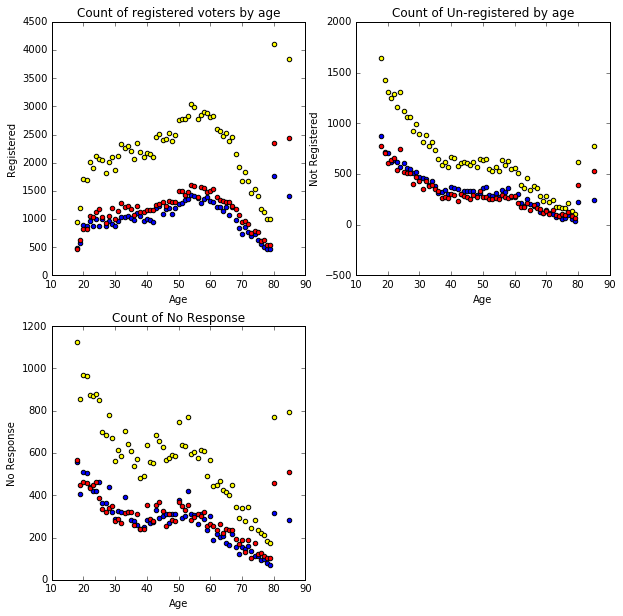

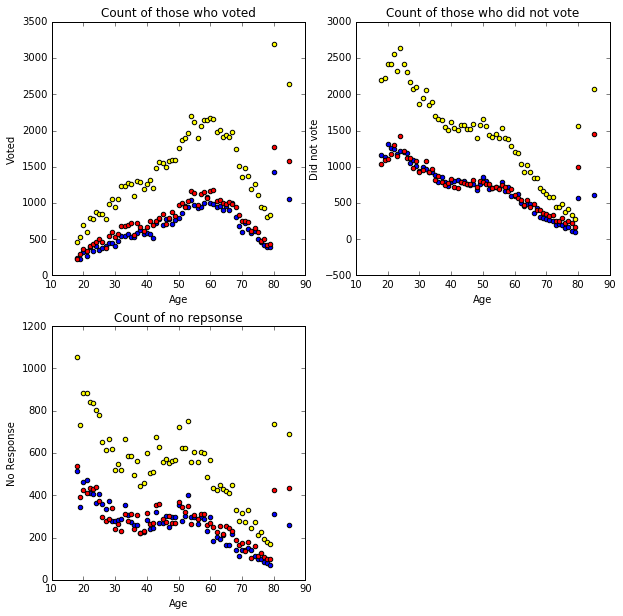

In [73]:
# splitting df by all data 18-80+, males 18-80+, and females 18-80+
by_age = df.ix[17:80]
males = df.ix[93:156]
females = df.ix[169:232]
ages = range(18, 80)
ages.extend([80, 85])

registrations = plt.figure(figsize=(10, 10))

# Number registered by age
censusplot = registrations.add_subplot(221)
plt.xlabel('Age')
plt.ylabel('Registered')
plt.title('Count of registered voters by age')
censusplot.scatter(ages, by_age[[3]], c='yellow')
censusplot.scatter(ages, males[[3]], c='blue')
censusplot.scatter(ages, females[[3]], c='red')


# not registered
censusplot = registrations.add_subplot(222)
plt.xlabel('Age')
plt.ylabel('Not Registered')
plt.title('Count of Un-registered by age')
censusplot.scatter(ages, by_age[[5]], c='yellow')
censusplot.scatter(ages, males[[5]], c='blue')
censusplot.scatter(ages, females[[5]], c='red')

# No Response
censusplot = registrations.add_subplot(223)
plt.xlabel('Age')
plt.ylabel('No Response')
plt.title('Count of No Response')
censusplot.scatter(ages, by_age[[7]], c='yellow')
censusplot.scatter(ages, males[[7]], c='blue')
censusplot.scatter(ages, females[[7]], c='red')

plt.show()

voters = plt.figure(figsize=(10, 10))

# Number voted by age
censusplot = voters.add_subplot(221)
plt.xlabel('Age')
plt.ylabel('Voted')
plt.title('Count of those who voted')
censusplot.scatter(ages, by_age[[9]], c='yellow')
censusplot.scatter(ages, males[[9]], c='blue')
censusplot.scatter(ages, females[[9]], c='red')

# did not vote
censusplot = voters.add_subplot(222)
plt.xlabel('Age')
plt.ylabel('Did not vote')
plt.title('Count of those who did not vote')
censusplot.scatter(ages, by_age[[11]], c='yellow')
censusplot.scatter(ages, males[[11]], c='blue')
censusplot.scatter(ages, females[[11]], c='red')

# No Response
censusplot = voters.add_subplot(223)
plt.xlabel('Age')
plt.ylabel('No Response')
plt.title('Count of no repsonse')
censusplot.scatter(ages, by_age[[13]], c='yellow')
censusplot.scatter(ages, males[[13]], c='blue')
censusplot.scatter(ages, females[[13]], c='red')

Our first three graphs concentrate on age vs number of people registered to vote. What it shows is that the numbers of people registered by age steadily increase from 18-about 60, then start to decline from there. This is true for both men and women, and is reasonable to assume given that the cohort of voters over 60 would start to diminish as age increases. 

Those who are not registered show a very different trend, decreasing between 18-40, leveling off 40-60, then decreasing after age 60. Again the decrease after age 60 makes sense. The numbers of people registered to vote decreasing as cohorts increase in age make sense to me, although I would have expected the trend to level off earlier than age 40. I think many young people get more and more engaged in the political process as time goes on, but I would have thought that everyone who is going to be engaged would have done so in their early 30's, rather than as late as 40. These trends hold steady for men and women.

Finally, those who gave no response to the registration question show a general downward trend, but a slightly positive trend locally between ages 40-60. 

Outliers in all three are for ages 75-80 and 80+ as those groups are consolidated together.

----

For the question of who did and did not vote, the trends are remarkably similar to the descriptions above. This is fairly bizarre because common knowledge in political science is that young people don't vote and retired folks do. Now some of this can be explained by the decreasing cohort sizes after age 60, but it does not explain the general downward trend in voting from age ~27 on. There is a spike in voters in their early 20's (likely due to 'rock-the-vote' and similar campaigns), but otherwise the trend is negative over time. Very peculiar. I would be interested to know what election cycle/race this data is for.

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**

So here is a list of tasks I would want to do and questions I would want answered from this data alone:

1. What are the numerical trends in voter registration and voting status. This could be discovered by linear regression of the above data.
2. Are any of the anomalies in the data explained by citizenship/non-citizenship. I would determine the overall trends, then determine trends in citizenship status - if anomalies line up with trends in citizenship, that could be a possible explanation for different local relationships between age and voting/registration status.
3. If we extended the right to vote for non-citizens, what would these trends look like? This would extrapolate data from part 2 onto our full dataset.
4. Are any of the trends statistically different between men and women? It appears not visually, but regression would help.

Additionally, some further data could help us answer any number of questions:

1. How do these data align with motor vehicle licensure/registration status? Could we have more people registered to vote if they were encouraged to do so (or automatically registered) when they came in contact with the department of motor vehicles. We would need vehicle registration/driver's license data for this analysis.
2. Obviously, trends by age in which political parties are voted for are important for political scientists. We would need exit-poll data. More interestingly for me though, would be to see how voter preferences change over time. For this we would need longitudinal, cohort data rather than cross-sectional data from one election.